### Formative Research Code

### Library Imports

In [33]:
import numpy as np 
import matplotlib.pyplot as plt

### Triangular Function


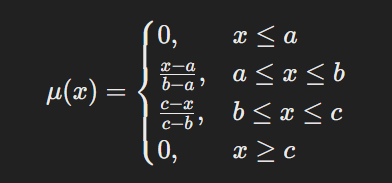

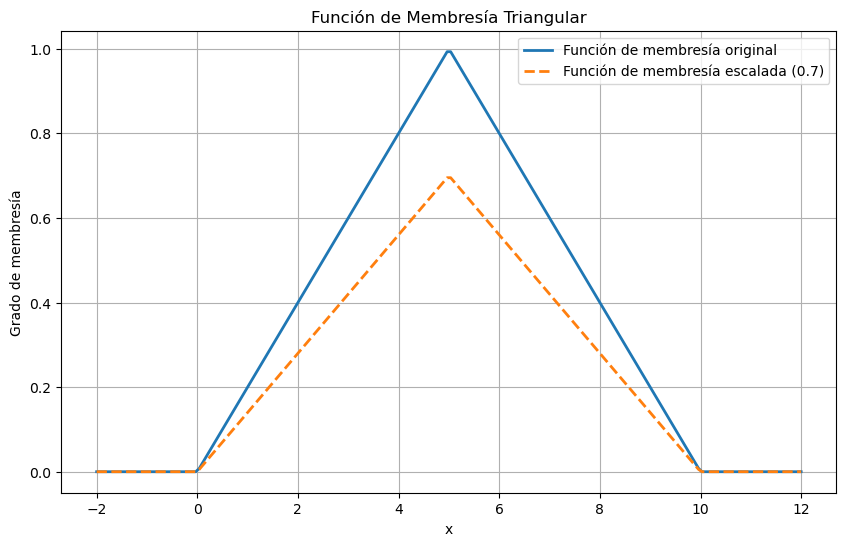

In [34]:
class TriangularMF:
    def __init__(self, name, a, b, c):
        self.name = name
        self.a = a
        self.b = b
        self.c = c

    def membership(self, x):
        x = np.array(x)
        y = np.zeros_like(x, dtype=float)

        # Evitar divisiones por cero
        b_minus_a = self.b - self.a if self.b != self.a else 1e-6
        c_minus_b = self.c - self.b if self.c != self.b else 1e-6

        # Región creciente
        y = np.where((self.a < x) & (x <= self.b), (x - self.a) / b_minus_a, y)

        # Región decreciente
        y = np.where((self.b < x) & (x < self.c), (self.c - x) / c_minus_b, y)

        return y

    def scale_membership(self, scale):
        """
        Escala la función de membresía por un factor dado.
        """
        def scaled_mf(x):
            return scale * self.membership(x)
        return scaled_mf

# Definición de la función de membresía triangular
tri_mf = TriangularMF("TriangularMF", a=0, b=5, c=10)

# Rango de valores de x
x = np.linspace(-2, 12, 200)

# Evaluación de la función original y escalada
original_y = tri_mf.membership(x)
scaled_y = tri_mf.scale_membership(0.7)(x)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, original_y, label="Función de membresía original", linewidth=2)
plt.plot(x, scaled_y, label="Función de membresía escalada (0.7)", linestyle="--", linewidth=2)

plt.title("Función de Membresía Triangular")
plt.xlabel("x")
plt.ylabel("Grado de membresía")
plt.grid(True)
plt.legend()
plt.show()




### Trapezoidal Function

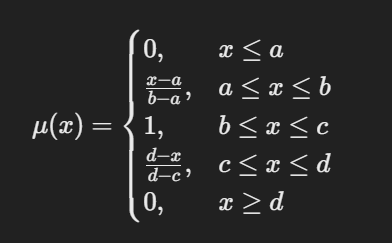

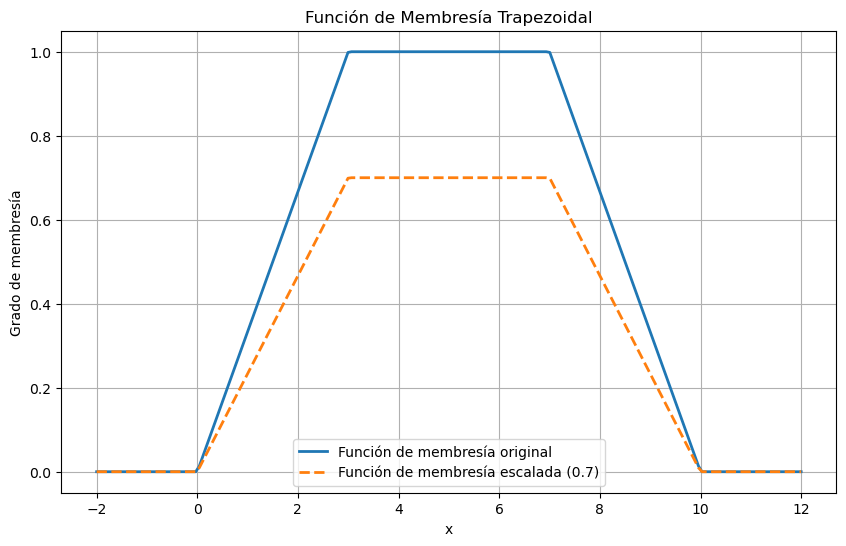

In [35]:
class TrapezoidalMF:
    def __init__(self, name, a, b, c, d):
        """
        Inicializa la función trapezoidal.
        - a, d: Límites donde la membresía es 0.
        - b, c: Límites donde la membresía es 1.
        """
        self.name = name
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def membership(self, x):
        """
        Calcula el grado de membresía para un valor o arreglo de valores.
        """
        x = np.array(x)  # Asegúrate de que x sea un arreglo de numpy
        y = np.zeros_like(x, dtype=float)

        # Evitar divisiones por cero
        b_minus_a = self.b - self.a if self.b != self.a else 1e-6
        d_minus_c = self.d - self.c if self.d != self.c else 1e-6

        # Región creciente
        y = np.where((self.a < x) & (x <= self.b), (x - self.a) / b_minus_a, y)

        # Región constante
        y = np.where((self.b < x) & (x <= self.c), 1.0, y)

        # Región decreciente
        y = np.where((self.c < x) & (x < self.d), (self.d - x) / d_minus_c, y)

        return y

    def scale_membership(self, scale):
        """
        Escala la función de membresía por un factor dado.
        """
        def scaled_mf(x):
            return scale * self.membership(x)
        return scaled_mf

# Definición de la función de membresía trapezoidal
trap_mf = TrapezoidalMF("TrapezoidalMF", a=0, b=3, c=7, d=10)

# Rango de valores de x
x = np.linspace(-2, 12, 200)

# Evaluación de la función original y escalada
original_y = trap_mf.membership(x)
scaled_y = trap_mf.scale_membership(0.7)(x)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, original_y, label="Función de membresía original", linewidth=2)
plt.plot(x, scaled_y, label="Función de membresía escalada (0.7)", linestyle="--", linewidth=2)

plt.title("Función de Membresía Trapezoidal")
plt.xlabel("x")
plt.ylabel("Grado de membresía")
plt.grid(True)
plt.legend()
plt.show()


### Gaussian Function


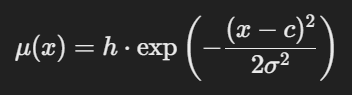

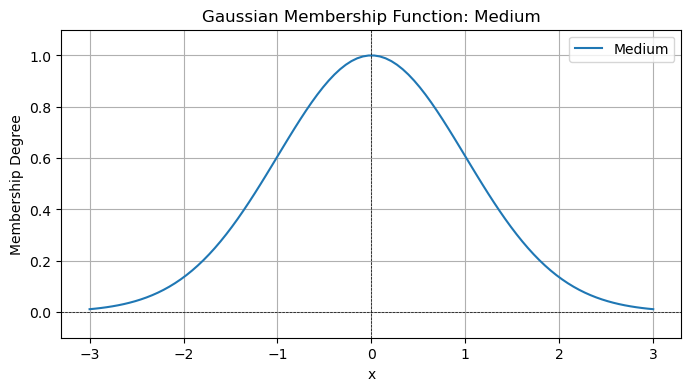

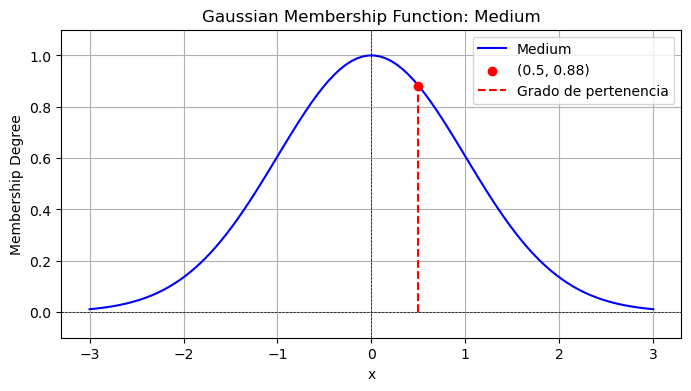

In [36]:

class GaussianMF:
    def __init__(self, name, a, b, c):
        """
        Inicializa la función de membresía gaussiana.
        - name: Nombre del término difuso (por ejemplo, 'medium').
        - a: Altura máxima de la curva (normalmente 1, ya que no puede exceder ese valor).
        - b: Centro de la curva gaussiana (media).
        - c: Anchura de la curva (desviación estándar).
        """
        self.name = name  # Nombre de la función de membresía
        self.a = min(a, 1)  # Asegurar que la altura máxima no supere 1
        self.b = b        # Centro de la curva (pico de la función)
        self.c = c if c != 0 else 0.0001  # Evitar división por cero

    def membership(self, x):
        """
        Calcula el grado de membresía para un valor x usando la fórmula de la gaussiana:
        μ(x) = a * exp(-((x - b)^2) / (2 * c^2))
        Devuelve un valor entre 0 y 'a'.
        """
        return self.a * np.exp(-((x - self.b) ** 2) / (2 * self.c ** 2))

    def scale_membership(self, scale):
        """
        Escala la función de membresía por un factor dado.
        - scale: Factor de escala para ajustar el grado de pertenencia.
        Devuelve una nueva función de membresía escalada.
        """
        def scaled_mf(x):
            return min(scale * self.membership(x), 1)  # Asegurar que el valor no supere 1
        return scaled_mf

    def plot(self, resolution=100):
        """
        Grafica la función de membresía gaussiana.
        - resolution: Número de puntos para la gráfica (mayor número = mayor detalle).
        """
        # Generar puntos para el eje x en el rango [b - 3*c, b + 3*c]
        x = np.linspace(self.b - 3 * self.c, self.b + 3 * self.c, resolution)
        y = [self.membership(value) for value in x]  # Calcular el grado de pertenencia para cada x

        # Crear la gráfica
        plt.figure(figsize=(8, 4))
        plt.plot(x, y, label=self.name)
        plt.title(f"Gaussian Membership Function: {self.name}")
        plt.xlabel("x")
        plt.ylabel("Membership Degree")
        plt.ylim(-0.1, 1.1)  # Limitar el rango del eje y
        plt.axhline(0, color='black', linewidth=0.5, linestyle="--")  # Línea horizontal en y=0
        plt.axvline(0, color='black', linewidth=0.5, linestyle="--")  # Línea vertical en x=0
        plt.grid()  # Mostrar la cuadrícula
        plt.legend()  # Mostrar la leyenda
        plt.show(block=True)  # Asegura que la gráfica se muestre

    def plot_with_membership(self, x_value, resolution=100):
        """
        Grafica la función gaussiana y resalta el grado de membresía para un valor específico.
        - x_value: Valor para el cual se desea calcular y graficar el grado de pertenencia.
        - resolution: Número de puntos para la gráfica.
        """
        # Generar puntos en el rango [b - 3*c, b + 3*c]
        x = np.linspace(self.b - 3 * self.c, self.b + 3 * self.c, resolution)
        y = [self.membership(value) for value in x]  # Calcular el grado de pertenencia para cada x

        # Calcular el grado de pertenencia para x_value
        y_value = self.membership(x_value)

        # Crear la gráfica
        plt.figure(figsize=(8, 4))
        plt.plot(x, y, label=self.name, color='blue')  # Función gaussiana en azul
        plt.scatter([x_value], [y_value], color='red', zorder=5, label=f"({x_value}, {y_value:.2f})")  # Punto rojo
        plt.vlines(x_value, 0, y_value, color='red', linestyle='--', label="Grado de pertenencia")  # Línea vertical roja

        # Configuración del gráfico
        plt.title(f"Gaussian Membership Function: {self.name}")
        plt.xlabel("x")
        plt.ylabel("Membership Degree")
        plt.ylim(-0.1, self.a + 0.1)  # Ajustar el límite superior del eje y
        plt.axhline(0, color='black', linewidth=0.5, linestyle="--")  # Línea horizontal en y=0
        plt.axvline(0, color='black', linewidth=0.5, linestyle="--")  # Línea vertical en x=0
        plt.grid()  # Mostrar la cuadrícula
        plt.legend()  # Mostrar la leyenda
        plt.show(block=True)  # Asegura que la gráfica se muestre

# Ejemplo de prueba para graficar la función de membresía gaussiana
gaussian_example = GaussianMF(name='Medium', a=1, b=0, c=1)
gaussian_example.plot()  # Graficar la función gaussiana
gaussian_example.plot_with_membership(x_value=0.5)  # Graficar con un valor resaltado



Test Gaussian Function 

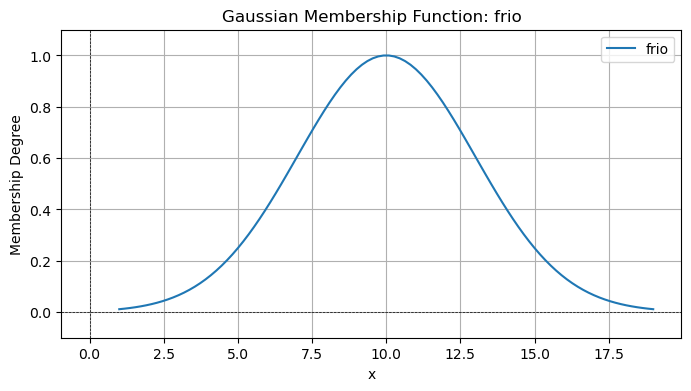

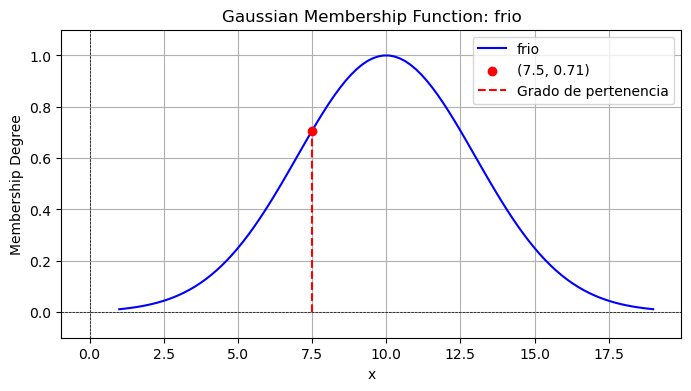

In [37]:
example=GaussianMF('frio',1,10,3)

example.plot()

example.plot_with_membership(7.5)

### Fuzzy Variable Class

In [38]:

class FuzzyVariable:
    """
    Clase que representa una variable difusa con un conjunto de términos lingüísticos.
    - name: Nombre de la variable (por ejemplo, 'Temperature').
    - range_: Rango de valores que puede tomar la variable difusa.
    """
    def __init__(self, name, range_):
        self.name = name               # Nombre de la variable difusa, por ejemplo, 'Temperature'
        self.range = range_            # Rango de valores permitidos para esta variable (ej: (0, 100))
        self.terms = {}                # Diccionario para almacenar términos lingüísticos asociados a la variable

    def add_term(self, term):
        """
        Agrega un término lingüístico (fuzzy term) a la variable difusa.
        - term: Un objeto que representa un término lingüístico, que debe tener un atributo 'name'.
        """
        self.terms[term.name] = term   # Asocia el término al diccionario usando su nombre como clave

    def fuzzify(self, value):
        """
        Calcula los grados de membresía para un valor específico.
        - value: Valor numérico 'crisp' para el que se calcularán los grados de pertenencia.
        Devuelve un diccionario con el nombre de cada término y su respectivo grado de membresía.
        """
        return {name: term.membership(value) for name, term in self.terms.items()}  # Calcula el grado de pertenencia para cada término

### Fuzzy Inference System Mamdani

In [39]:


import numpy as np

class FuzzySystem:
    """
    Clase que representa un sistema de inferencia difusa.
    Se encarga de manejar variables difusas, reglas, y el proceso completo de inferencia.
    """
    def __init__(self):
        self.variables = {}    # Diccionario para almacenar las variables difusas del sistema
        self.rules = []        # Lista para almacenar las reglas de inferencia difusa
        self.output_range = None  # Rango de salida para la variable difusa de salida

    def add_variable(self, variable):
        """
        Agrega una variable difusa al sistema.
        - variable: Objeto de tipo FuzzyVariable que representa una variable difusa.
        """
        self.variables[variable.name] = variable  # Se agrega al diccionario usando su nombre como clave

    def add_rule(self, rule):
        """
        Agrega una regla de inferencia difusa al sistema.
        - rule: Diccionario que define una regla con condiciones ('if') y una conclusión ('then').
        """
        self.rules.append(rule)  # Se añade la regla a la lista de reglas del sistema

    def fuzzify(self, inputs):
        """
        Fuzzifica las entradas crisp del sistema, es decir, convierte valores numéricos en grados de pertenencia.
        - inputs: Diccionario con variables y sus valores numéricos.
        Retorna un diccionario con los grados de pertenencia para cada término lingüístico.
        """
        return {var: self.variables[var].fuzzify(val) for var, val in inputs.items()}

    def evaluate_rules(self, fuzzified_inputs):
        """
        Evalúa todas las reglas con base en las entradas fuzzificadas.
        - fuzzified_inputs: Diccionario con los grados de pertenencia para cada término lingüístico.
        Retorna una lista con los resultados de las reglas (activación y conclusión).
        """
        rule_results = []
        for rule in self.rules:
            conditions = rule['if']    # Condiciones de la regla (ej: {'Temperature': 'High'})
            output = rule['then']      # Conclusión de la regla (ej: ('FanSpeed', 'Fast'))

            # Calcula la fuerza de activación usando el operador AND (mínimo de los grados de pertenencia)
            activation = min(fuzzified_inputs[var][term] for var, term in conditions.items())
            rule_results.append((activation, output))  # Guarda el resultado de la regla

            print('Active Rules:')
            print(rule_results[-1])   # Muestra la última regla activada para depuración

        return rule_results

    def aggregate(self, rule_results):
        """
        Agrega las salidas difusas resultantes de todas las reglas activadas.
        - rule_results: Lista de resultados de reglas con sus activaciones.
        Retorna un conjunto difuso agregado.
        """
        output_range = self.output_range  # Rango de salida definido para la variable de salida
        aggregated = np.zeros_like(output_range)  # Inicializa el conjunto difuso agregado con ceros

        for activation, (output_var, output_term) in rule_results:
            mf = self.variables[output_var].terms[output_term].membership  # Función de membresía del término de salida
            aggregated = np.maximum(aggregated, np.minimum(activation, mf(output_range)))  # Operación de agregación (máximo de mínimos)

        return aggregated

    def defuzzify(self, aggregated):
        """
        Defuzzifica el conjunto difuso agregado para obtener un valor crisp.
        - aggregated: Conjunto difuso agregado.
        Utiliza el método del centroide para la defuzzificación.
        """
        numerator = np.sum(aggregated * self.output_range)   # Suma ponderada de los valores de salida
        denominator = np.sum(aggregated)                     # Suma de los grados de pertenencia
        return numerator / denominator if denominator != 0 else 0  # Retorna el valor defuzzificado o 0 si no hay activación

    def simulate(self, inputs):
        """
        Simula el sistema difuso dado un conjunto de entradas crisp.
        - inputs: Diccionario con las variables de entrada y sus valores numéricos.
        Retorna el valor de salida defuzzificado.
        """
        fuzzified_inputs = self.fuzzify(inputs)              # Paso 1: Fuzzificación de las entradas
        rule_results = self.evaluate_rules(fuzzified_inputs)  # Paso 2: Evaluación de reglas difusas
        aggregated = self.aggregate(rule_results)             # Paso 3: Agregación de las salidas difusas
        return self.defuzzify(aggregated)                     # Paso 4: Defuzzificación para obtener el resultado final


### Test Mamdani FIS

Generate Fuzzy Inference System Object

In [40]:
# Creación del sistema difuso
fis = FuzzySystem()


Add Fuzzy Variables

In [41]:
# Definición de variables difusas
temperature = FuzzyVariable('Temperature', np.linspace(0, 50, 100))
temperature.add_term(TriangularMF('Cold', 0, 0, 25))
temperature.add_term(TrapezoidalMF('Warm', 15, 25,30, 35))
temperature.add_term(TriangularMF('Hot', 30, 50, 50))

humidity = FuzzyVariable('Humidity', np.linspace(0, 100, 100))
humidity.add_term(TriangularMF('Dry', 0, 0, 50))
humidity.add_term(TriangularMF('Normal', 30, 50, 70))
humidity.add_term(TriangularMF('Wet', 50, 100, 100))

fan_speed = FuzzyVariable('Fan Speed', np.linspace(0, 100, 100))
fan_speed.add_term(GaussianMF('Low', 1, 10, 20))
fan_speed.add_term(GaussianMF('Medium', 1, 40, 15))
fan_speed.add_term(GaussianMF('High', 1, 80, 20))

fis.add_variable(temperature)
fis.add_variable(humidity)
fis.add_variable(fan_speed)

fis.output_range = fan_speed.range


Add Rules

In [42]:
fis.add_rule({'if': {'Temperature': 'Cold', 'Humidity': 'Dry'}, 'then': ('Fan Speed', 'Low')})
fis.add_rule({'if': {'Temperature': 'Cold', 'Humidity': 'Normal'}, 'then': ('Fan Speed', 'Low')})
fis.add_rule({'if': {'Temperature': 'Cold', 'Humidity': 'Wet'}, 'then': ('Fan Speed', 'Medium')})

fis.add_rule({'if': {'Temperature': 'Warm', 'Humidity': 'Dry'}, 'then': ('Fan Speed', 'Medium')})
fis.add_rule({'if': {'Temperature': 'Warm', 'Humidity': 'Normal'}, 'then': ('Fan Speed', 'Medium')})
fis.add_rule({'if': {'Temperature': 'Warm', 'Humidity': 'Wet'}, 'then': ('Fan Speed', 'High')})

fis.add_rule({'if': {'Temperature': 'Hot', 'Humidity': 'Dry'}, 'then': ('Fan Speed', 'Medium')})
fis.add_rule({'if': {'Temperature': 'Hot', 'Humidity': 'Normal'}, 'then': ('Fan Speed', 'High')})
fis.add_rule({'if': {'Temperature': 'Hot', 'Humidity': 'Wet'}, 'then': ('Fan Speed', 'High')})

# Reglas adicionales para mayor precisión
fis.add_rule({'if': {'Temperature': 'Cold', 'Humidity': 'Dry'}, 'then': ('Fan Speed', 'Low')})
fis.add_rule({'if': {'Temperature': 'Cold', 'Humidity': 'Wet'}, 'then': ('Fan Speed', 'Medium')})
fis.add_rule({'if': {'Temperature': 'Warm', 'Humidity': 'Wet'}, 'then': ('Fan Speed', 'High')})
fis.add_rule({'if': {'Temperature': 'Hot', 'Humidity': 'Dry'}, 'then': ('Fan Speed', 'Medium')})


Plots

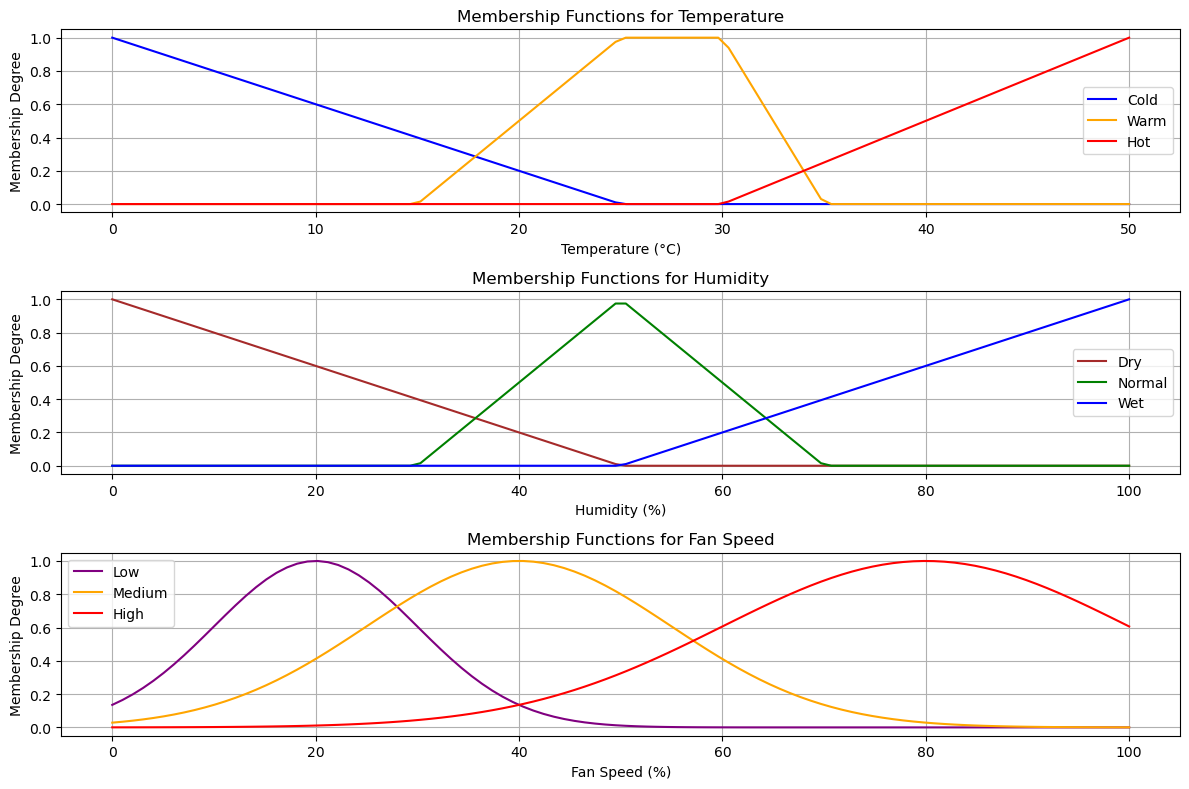

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir rangos
temperature_range = np.linspace(0, 50, 100)
humidity_range = np.linspace(0, 100, 100)
fan_speed_range = np.linspace(0, 100, 100)

# Funciones de membresía para la temperatura
cold = np.maximum(0, np.minimum(1, (25 - temperature_range) / 25))
warm = np.maximum(0, np.minimum((temperature_range - 15) / 10, np.minimum(1, (35 - temperature_range) / 5)))
hot = np.maximum(0, np.minimum(1, (temperature_range - 30) / 20))

# Funciones de membresía para la humedad
dry = np.maximum(0, np.minimum(1, (50 - humidity_range) / 50))
normal = np.maximum(0, np.minimum((humidity_range - 30) / 20, (70 - humidity_range) / 20))
wet = np.maximum(0, np.minimum(1, (humidity_range - 50) / 50))

# Funciones de membresía para la velocidad del ventilador (Gaussiana)
low = norm.pdf(fan_speed_range, 20, 10)  # Media = 20, Desviación estándar = 10
medium = norm.pdf(fan_speed_range, 40, 15)  # Media = 40, Desviación estándar = 15
high = norm.pdf(fan_speed_range, 80, 20)  # Media = 80, Desviación estándar = 20

# Normalizar funciones de velocidad del ventilador
low /= max(low)
medium /= max(medium)
high /= max(high)

# Crear los gráficos
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Gráfico de temperatura
axs[0].plot(temperature_range, cold, label='Cold', color='blue')
axs[0].plot(temperature_range, warm, label='Warm', color='orange')
axs[0].plot(temperature_range, hot, label='Hot', color='red')
axs[0].set_title('Membership Functions for Temperature')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Membership Degree')
axs[0].legend()
axs[0].grid()

# Gráfico de humedad
axs[1].plot(humidity_range, dry, label='Dry', color='brown')
axs[1].plot(humidity_range, normal, label='Normal', color='green')
axs[1].plot(humidity_range, wet, label='Wet', color='blue')
axs[1].set_title('Membership Functions for Humidity')
axs[1].set_xlabel('Humidity (%)')
axs[1].set_ylabel('Membership Degree')
axs[1].legend()
axs[1].grid()

# Gráfico de velocidad del ventilador
axs[2].plot(fan_speed_range, low, label='Low', color='purple')
axs[2].plot(fan_speed_range, medium, label='Medium', color='orange')
axs[2].plot(fan_speed_range, high, label='High', color='red')
axs[2].set_title('Membership Functions for Fan Speed')
axs[2].set_xlabel('Fan Speed (%)')
axs[2].set_ylabel('Membership Degree')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()


# Sistema de Inferencia Difusa Mamdani

Este cuaderno implementa un sistema de inferencia difusa basado en el modelo Mamdani. Las principales características son:

1. **Fuzzificación**: Conversión de valores crisp (precisos) en valores difusos mediante funciones de membresía.
2. **Evaluación de Reglas**: Uso de reglas "SI-ENTONCES" para modelar la relación entre las variables de entrada y salida.
3. **Agregación**: Combinación de los resultados de las reglas activadas.
4. **Defuzzificación**: Conversión del conjunto difuso agregado en un valor crisp de salida.

## Variables Difusas
- **Temperatura**: Cold, Warm, Hot.
- **Humedad**: Dry, Normal, Wet.
- **Velocidad del Ventilador**: Low, Medium, High.

## Ejemplo Funcional
Se agregaron reglas específicas para probar el sistema con entradas funcionales. Por ejemplo:

1. Si **Temperatura** es `Cold` y **Humedad** es `Dry`, entonces **Velocidad del Ventilador** es `Low`.
2. Si **Temperatura** es `Warm` y **Humedad** es `Normal`, entonces **Velocidad del Ventilador** es `Medium`.
3. Si **Temperatura** es `Hot` y **Humedad** es `Wet`, entonces **Velocidad del Ventilador** es `High`.

Con estas reglas, las entradas `Temperature=20` y `Humidity=40` activarán una salida intermedia.
"""

### Simulation

In [44]:
# Simulación con entradas funcionales
inputs = {'Temperature': 20, 'Humidity': 40}  # Caso de prueba funcional
output = fis.simulate(inputs)
print(f"Salida crisp (Fan Speed): {output}")

Active Rules:
(array(0.2), ('Fan Speed', 'Low'))
Active Rules:
(array(0.2), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.2), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.5), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.2), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Salida crisp (Fan Speed): 38.33391544476653


In [48]:
test_cases = [
    {'Temperature': 10, 'Humidity': 20},
    {'Temperature': 30, 'Humidity': 50},
    {'Temperature': 45, 'Humidity': 80}
]

for case in test_cases:
    output = fis.simulate(case)
    print(f"Entrada: {case} -> Salida crisp (Fan Speed): {output}")


Active Rules:
(array(0.6), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.6), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Entrada: {'Temperature': 10, 'Humidity': 20} -> Salida crisp (Fan Speed): 22.55003153378342
Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(1.), ('Fan Speed', 'Medium'))
Active Rule

In [49]:
for temp in range(0, 51, 5):  # De 0°C a 50°C en pasos de 5
    inputs = {'Temperature': temp, 'Humidity': 50}
    output = fis.simulate(inputs)
    print(f"Temperature: {temp}, Humidity: 50 -> Fan Speed: {output}")


Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Temperature: 0, Humidity: 50 -> Fan Speed: 0
Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.8), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rul

Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Low'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Active Rules:
(array(0.), ('Fan Speed', 'High'))
Active Rules:
(array(0.), ('Fan Speed', 'Medium'))
Activ

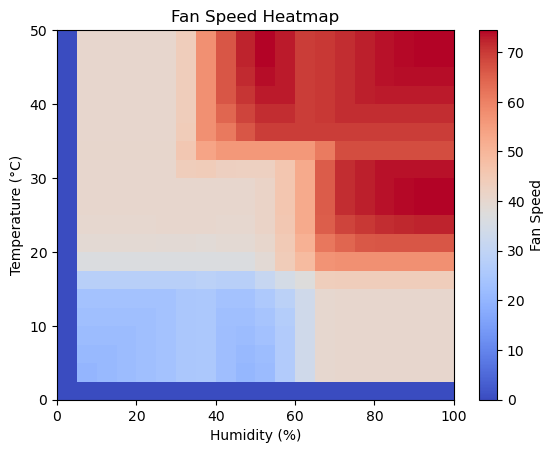

In [50]:
import numpy as np
import matplotlib.pyplot as plt

temps = np.linspace(0, 50, 20)
hums = np.linspace(0, 100, 20)
fan_speeds = np.zeros((len(temps), len(hums)))

for i, temp in enumerate(temps):
    for j, hum in enumerate(hums):
        inputs = {'Temperature': temp, 'Humidity': hum}
        fan_speeds[i, j] = fis.simulate(inputs)

plt.imshow(fan_speeds, extent=[0, 100, 0, 50], origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Fan Speed')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Fan Speed Heatmap')
plt.show()
